In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils.plotter as pltutils
from importlib import reload
reload(pltutils);

### Plot Style (remove if seaborn is not installed)

In [2]:
# comment out this cell if seaborn is not installed
# import seaborn as sns
# sns.set_style("ticks")
# sns.set_context("paper")
# sns.color_palette("colorblind");

### Save Folder

In [3]:
save_as = '.pdf'
save_figs_to_folder = None # will not save if set to None
save_figs_to_folder = './results/figs'

### Font Selection

In [4]:
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] =  "Times New Roman"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

LABELS_SIZE = 16
LEGEND_SIZE = 12
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=LABELS_SIZE)
plt.rc('ytick', labelsize=LABELS_SIZE)
plt.rc('legend', fontsize=LEGEND_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

# Regret Plots

In [5]:
sweep_results_folder = './results/regret-sweep'
arrival_rate_list = [2, 4, 6]
noise_variance_list = [0, 0.01, 0.05, 0.1] 
show_theoretical = [0, 0, 0, 1]
plot_style = ['-x', '-o', '-s', '-^']

### Combined Regret Plots

Fit co-effs [1 sqrt(T)log(T)] = [2144.367    0.712]
Fit co-effs [1 sqrt(T)log(T)] = [1937.211    0.284]
Fit co-effs [1 sqrt(T)log(T)] = [1143.586    0.592]


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


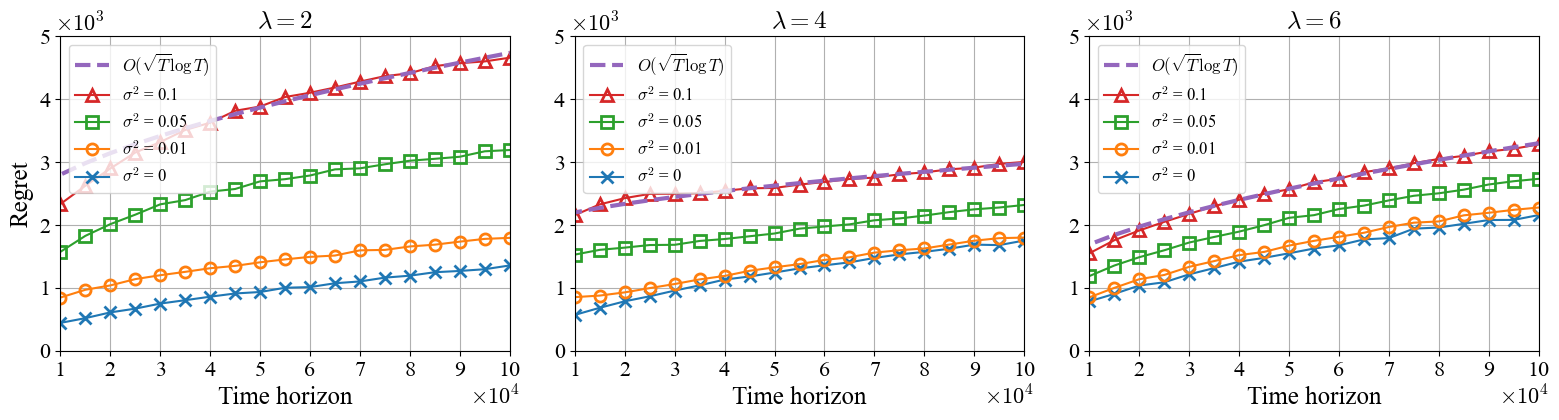

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=len(arrival_rate_list), figsize=(16, 4.6))
for ii, arrival_rate in enumerate(arrival_rate_list):
    ax = axs[ii]
    pltutils.plot_regret_curve(ax, arrival_rate, noise_variance_list, show_theoretical, sweep_results_folder, plot_style, ii == 0, LABELS_SIZE)
    ax.set_title('$\lambda = ' + str(arrival_rate) + '$')
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + '/regret-plots' + save_as, bbox_inches='tight')
plt.show()

### Separate Regret Plots

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


Fit co-effs [1 sqrt(T)log(T)] = [2144.367    0.712]


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


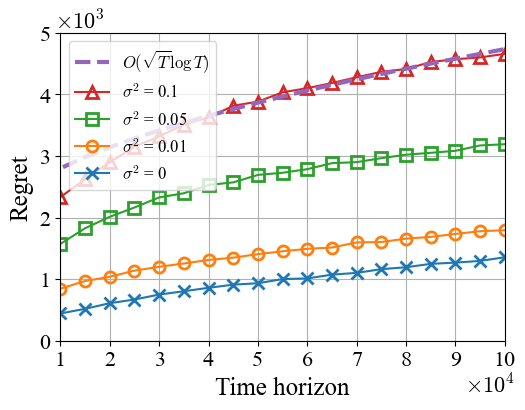

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


Fit co-effs [1 sqrt(T)log(T)] = [1937.211    0.284]


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


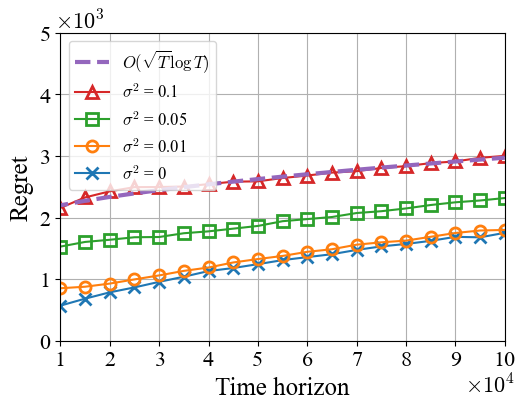

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp


Fit co-effs [1 sqrt(T)log(T)] = [1143.586    0.592]


'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


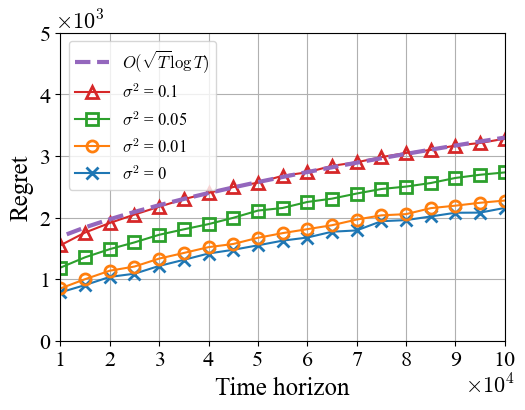

In [7]:
for ii, arrival_rate in enumerate(arrival_rate_list):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.6, 4.5))
    pltutils.plot_regret_curve(ax, arrival_rate, noise_variance_list, show_theoretical, sweep_results_folder, plot_style, True, LABELS_SIZE)
    plt.tight_layout()
    if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + '/regret-plots-lambda-' + str(arrival_rate).replace('.','_') + save_as, bbox_inches='tight')
    plt.show();

# Cost and Backlog Plots

In [8]:
LABELS_SIZE = 14
LEGEND_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=LABELS_SIZE)
plt.rc('ytick', labelsize=LABELS_SIZE)
plt.rc('legend', fontsize=LEGEND_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [9]:
run_results_folder = './results/'
arrival_rate = 4
noise_variance = 0.05

stat_cost_till_tt, \
    unknownT_tran_cost_at_tt, unknownT_backlog_at_tt, \
    unknownT_tran_cost_till_tt, unknownT_backlog_cost_at_tt,\
    knownT_tran_cost_at_tt, knownT_backlog_at_tt, \
    knownT_tran_cost_till_tt, knownT_backlog_cost_at_tt, \
    oracle_tran_cost_at_tt, oracle_backlog_at_tt, \
    oracle_tran_cost_till_tt, oracle_backlog_cost_at_tt = np.load(run_results_folder + 'run-lambda-' + str(arrival_rate).replace('.','_') + '-var-' + str(noise_variance).replace('.','_') + '.npy')


FileNotFoundError: [Errno 2] No such file or directory: './results/run-lambda-4-var-0_05.npy'

### Combined Backlog and Cost Plots

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


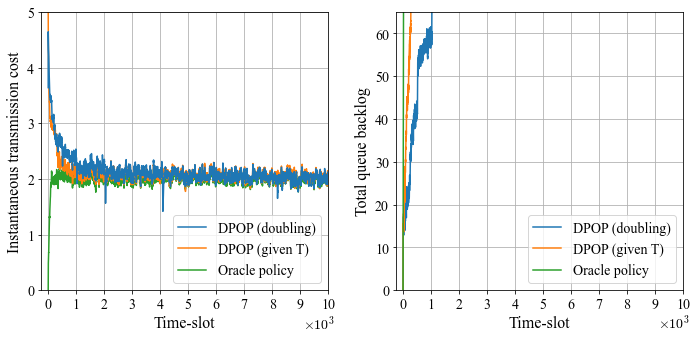

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
pltutils.plot_backlog_curve(axs[1], unknownT_backlog_at_tt, knownT_backlog_at_tt, oracle_backlog_at_tt, LABELS_SIZE)
pltutils.plot_transmission_cost_curve(axs[0], unknownT_tran_cost_at_tt, knownT_tran_cost_at_tt, oracle_tran_cost_at_tt, LABELS_SIZE)
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + '/run-plots' + save_as, bbox_inches='tight')
plt.show();

### Separate Backlog and Cost Plots

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


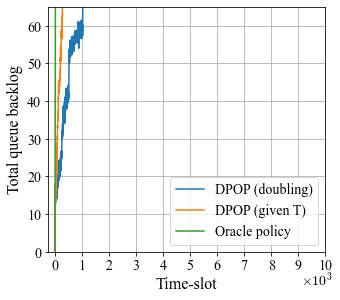

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4.45))
pltutils.plot_backlog_curve(ax, unknownT_backlog_at_tt, knownT_backlog_at_tt, oracle_backlog_at_tt, LABELS_SIZE)
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + '/run-plots-backlog' + save_as, bbox_inches='tight')
plt.show();

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


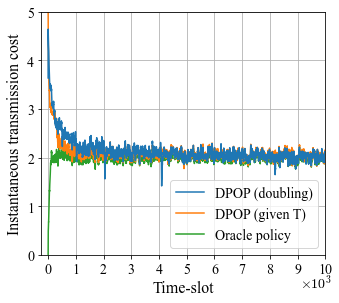

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4.5))
pltutils.plot_transmission_cost_curve(ax, unknownT_tran_cost_at_tt, knownT_tran_cost_at_tt, oracle_tran_cost_at_tt, LABELS_SIZE)
plt.tight_layout()
if save_figs_to_folder is not None: plt.savefig(save_figs_to_folder + '/run-plots-cost' + save_as, bbox_inches='tight')
plt.show();